# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import math
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
mainPath = '/Users/deangelo/Desktop/School/GT - Mom/Homework/06-Python-APIs/Instructions/'
output_data_file = f'{mainPath}output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='

citySets = np.array_split(cities, math.ceil(len(cities)/40))
cityData = []
sCount = 0
errCount = 0

print('Beginning Data Retrieval\n-----------------------------')

for citySet in citySets:
    rCount = 0
    sCount = sCount + 1
    
    for city in citySet:
        rCount = rCount + 1
        try:
            print(f'Processing Reccord {rCount} of Set {sCount} | {city}')
            response = requests.get(f'{url}{city}&appid={weather_api_key}')
            response.raise_for_status()
            
        except requests.HTTPError as exception:
            errCount = errCount + 1
            print(f'City, {city}, NOT found. Skipping...')
            continue
        
        cityData.append(response.json())

print(f'-----------------------------\nData Retrieval Complete.\nFound {len(cityData)} Records from {len(cities)} cities.\n{errCount} cities not found')

Beginning Data Retrieval
-----------------------------
Processing Reccord 1 of Set 1 | hutchinson
Processing Reccord 2 of Set 1 | hermanus
Processing Reccord 3 of Set 1 | honiara
Processing Reccord 4 of Set 1 | punta arenas
Processing Reccord 5 of Set 1 | rimbey
Processing Reccord 6 of Set 1 | vaini
Processing Reccord 7 of Set 1 | yulara
Processing Reccord 8 of Set 1 | upernavik
Processing Reccord 9 of Set 1 | filingue
Processing Reccord 10 of Set 1 | kodiak
Processing Reccord 11 of Set 1 | kirsanov
Processing Reccord 12 of Set 1 | busselton
Processing Reccord 13 of Set 1 | harper
Processing Reccord 14 of Set 1 | macklin
Processing Reccord 15 of Set 1 | baisha
Processing Reccord 16 of Set 1 | georgetown
Processing Reccord 17 of Set 1 | narsaq
Processing Reccord 18 of Set 1 | port elizabeth
Processing Reccord 19 of Set 1 | coihaique
Processing Reccord 20 of Set 1 | san quintin
Processing Reccord 21 of Set 1 | ushuaia
Processing Reccord 22 of Set 1 | umzimvubu
City, umzimvubu, NOT found.

Processing Reccord 20 of Set 5 | abu samrah
Processing Reccord 21 of Set 5 | chifeng
Processing Reccord 22 of Set 5 | lumphat
Processing Reccord 23 of Set 5 | gobabis
Processing Reccord 24 of Set 5 | naze
Processing Reccord 25 of Set 5 | kaitangata
Processing Reccord 26 of Set 5 | nelson bay
Processing Reccord 27 of Set 5 | barentsburg
City, barentsburg, NOT found. Skipping...
Processing Reccord 28 of Set 5 | lorengau
Processing Reccord 29 of Set 5 | attawapiskat
City, attawapiskat, NOT found. Skipping...
Processing Reccord 30 of Set 5 | kozhva
Processing Reccord 31 of Set 5 | warrnambool
Processing Reccord 32 of Set 5 | churapcha
Processing Reccord 33 of Set 5 | dicabisagan
Processing Reccord 34 of Set 5 | hrodna
Processing Reccord 35 of Set 5 | kieta
Processing Reccord 36 of Set 5 | dikson
Processing Reccord 37 of Set 5 | chanute
Processing Reccord 38 of Set 5 | hambantota
Processing Reccord 39 of Set 5 | boqueirao
Processing Reccord 40 of Set 5 | husavik
Processing Reccord 1 of Set 

Processing Reccord 39 of Set 9 | chicama
Processing Reccord 1 of Set 10 | cherskiy
Processing Reccord 2 of Set 10 | ewa beach
Processing Reccord 3 of Set 10 | marcona
City, marcona, NOT found. Skipping...
Processing Reccord 4 of Set 10 | pochutla
Processing Reccord 5 of Set 10 | arica
Processing Reccord 6 of Set 10 | longyearbyen
Processing Reccord 7 of Set 10 | shizuishan
Processing Reccord 8 of Set 10 | margate
Processing Reccord 9 of Set 10 | kalmunai
Processing Reccord 10 of Set 10 | diego de almagro
Processing Reccord 11 of Set 10 | williston
Processing Reccord 12 of Set 10 | sao miguel do araguaia
Processing Reccord 13 of Set 10 | serebryanyy bor
Processing Reccord 14 of Set 10 | palu
Processing Reccord 15 of Set 10 | baherden
Processing Reccord 16 of Set 10 | samusu
City, samusu, NOT found. Skipping...
Processing Reccord 17 of Set 10 | fare
Processing Reccord 18 of Set 10 | vanderhoof
Processing Reccord 19 of Set 10 | tavda
Processing Reccord 20 of Set 10 | hihifo
City, hihifo, 

Processing Reccord 20 of Set 14 | sabang
Processing Reccord 21 of Set 14 | comodoro rivadavia
Processing Reccord 22 of Set 14 | singapore
Processing Reccord 23 of Set 14 | morondava
Processing Reccord 24 of Set 14 | zomba
Processing Reccord 25 of Set 14 | dukat
Processing Reccord 26 of Set 14 | pangai
Processing Reccord 27 of Set 14 | gladstone
Processing Reccord 28 of Set 14 | don marcelino
City, don marcelino, NOT found. Skipping...
Processing Reccord 29 of Set 14 | borascu
Processing Reccord 30 of Set 14 | dhidhdhoo
Processing Reccord 31 of Set 14 | lata
Processing Reccord 32 of Set 14 | kirakira
Processing Reccord 33 of Set 14 | kontagora
Processing Reccord 34 of Set 14 | mandera
Processing Reccord 35 of Set 14 | bayanday
Processing Reccord 36 of Set 14 | sao raimundo nonato
Processing Reccord 37 of Set 14 | buraydah
Processing Reccord 38 of Set 14 | arrecife
Processing Reccord 39 of Set 14 | santa isabel do rio negro
Processing Reccord 1 of Set 15 | kavaratti
Processing Reccord 2 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityData_df = pd.DataFrame(columns = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])
dfCount = 0
for data in cityData:
    dfCount = dfCount + 1
    curCityInfo = {
        "City" : data['name'],
        "Lat" : data['coord']['lat'],
        "Lng" : data['coord']['lon'],
        "Max Temp" : round(data['main']['temp_max'], 2),
        "Humidity" : data['main']['humidity'],
        "Cloudiness" : data['clouds']['all'],
        "Wind Speed" : data['wind']['speed'],
        "Country" : data['sys']['country'],
        "Date" : data['dt']
    }
    
    cityData_df = cityData_df.append(curCityInfo, ignore_index = True)
cityData_df = cityData_df.rename_axis('City_ID')
cityData_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hutchinson,38.0608,-97.9298,298.05,67,1,0.45,US,1635012141
1,Hermanus,-34.4187,19.2345,287.54,70,62,3.64,ZA,1635012161
2,Honiara,-9.4333,159.9500,297.81,83,21,1.48,SB,1635012163
3,Punta Arenas,-53.1500,-70.9167,278.77,81,69,12.92,CL,1635012103
4,Rimbey,52.6334,-114.2353,278.06,97,100,2.02,CA,1635012164


In [5]:
cityData_csv = cityData_df.to_csv(output_data_file, index_label = 'City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cityData_df.loc[cityData_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

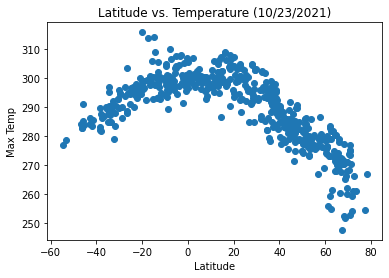

In [9]:
plt.figure(1)
plt.scatter(cityData_df['Lat'], cityData_df['Max Temp'])
plt.title(f'Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

## Latitude vs. Humidity Plot

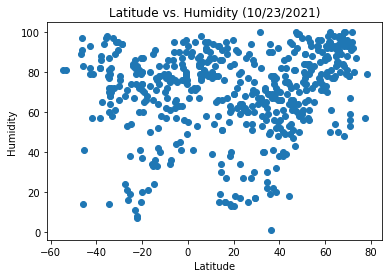

In [10]:
plt.figure(2)
plt.scatter(cityData_df['Lat'], cityData_df['Humidity'])
plt.title(f'Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

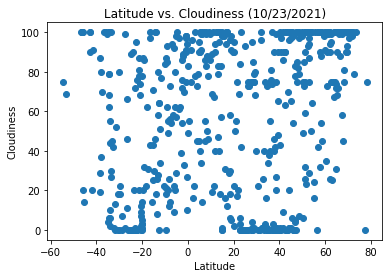

In [11]:
plt.figure(3)
plt.scatter(cityData_df['Lat'], cityData_df['Cloudiness'])
plt.title(f'Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

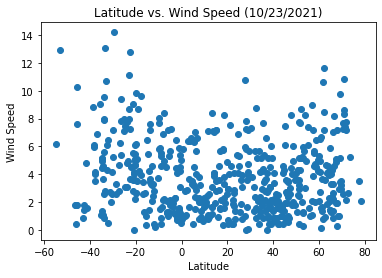

In [12]:
plt.figure(4)
plt.scatter(cityData_df['Lat'], cityData_df['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7736714995015365


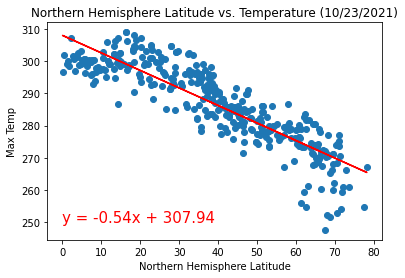

In [13]:
f1x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f1y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Max Temp']
(f1slope, f1intercept, f1rvalue, f1pvalue, f1stderr) = linregress(f1x_values, f1y_values)
f1regress_values = f1x_values * f1slope + f1intercept
f1line_eq = "y = " + str(round(f1slope,2)) + "x + " + str(round(f1intercept,2))
plt.scatter(f1x_values,f1y_values)
plt.plot(f1x_values,f1regress_values,"r-")
plt.annotate(f1line_eq,(0,250),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {f1rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.571019740474


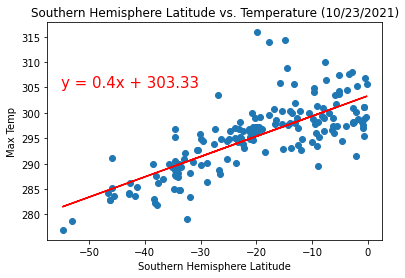

In [14]:
f1ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f1ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Max Temp']
(f1aslope, f1aintercept, f1arvalue, f1apvalue, f1astderr) = linregress(f1ax_values, f1ay_values)
f1aregress_values = f1ax_values * f1aslope + f1aintercept
f1aline_eq = "y = " + str(round(f1aslope,2)) + "x + " + str(round(f1aintercept,2))
plt.scatter(f1ax_values,f1ay_values)
plt.plot(f1ax_values,f1aregress_values,"r-")
plt.annotate(f1aline_eq,(-55,305),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Temperature ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {f1arvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06004558881143149


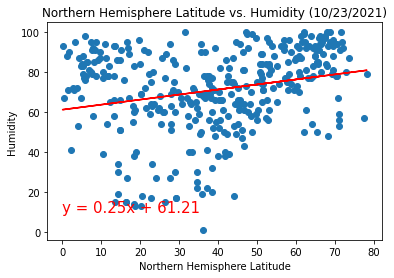

In [15]:
f2x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f2y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Humidity'].astype('float64')
(f2slope, f2intercept, f2rvalue, f2pvalue, f2stderr) = linregress(f2x_values, f2y_values)
f2regress_values = f2x_values * f2slope + f2intercept
f2line_eq = "y = " + str(round(f2slope,2)) + "x + " + str(round(f2intercept,2))
plt.scatter(f2x_values,f2y_values)
plt.plot(f2x_values,f2regress_values,"r-")
plt.annotate(f2line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {f2rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0035110934756470485


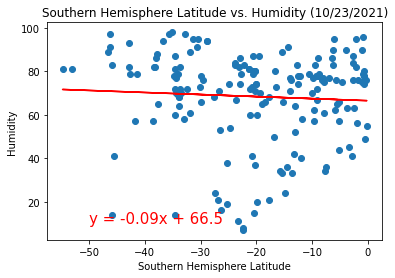

In [22]:
f2ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f2ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Humidity'].astype('float64')
(f2aslope, f2aintercept, f2arvalue, f2apvalue, f2astderr) = linregress(f2ax_values, f2ay_values)
f2aregress_values = f2ax_values * f2aslope + f2aintercept
f2aline_eq = "y = " + str(round(f2aslope,2)) + "x + " + str(round(f2aintercept,2))
plt.scatter(f2ax_values,f2ay_values)
plt.plot(f2ax_values,f2aregress_values,"r-")
plt.annotate(f2aline_eq,(-50,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {f2arvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.052501643469826664


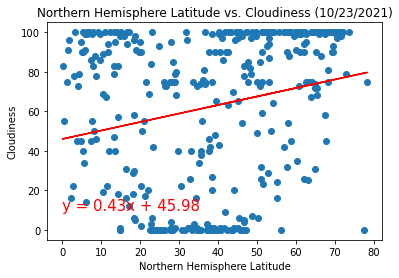

In [17]:
f3x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f3y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Cloudiness'].astype('float64')
(f3slope, f3intercept, f3rvalue, f3pvalue, f3stderr) = linregress(f3x_values, f3y_values)
f3regress_values = f3x_values * f3slope + f3intercept
f3line_eq = "y = " + str(round(f3slope,2)) + "x + " + str(round(f3intercept,2))
plt.scatter(f3x_values,f3y_values)
plt.plot(f3x_values,f3regress_values,"r-")
plt.annotate(f3line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {f3rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004012104389225566


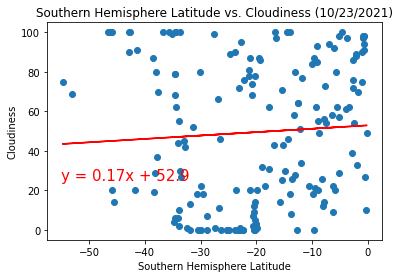

In [18]:
f3ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f3ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Cloudiness'].astype('float64')
(f3aslope, f3aintercept, f3arvalue, f3apvalue, f3astderr) = linregress(f3ax_values, f3ay_values)
f3aregress_values = f3ax_values * f3aslope + f3aintercept
f3aline_eq = "y = " + str(round(f3aslope,2)) + "x + " + str(round(f3aintercept,2))
plt.scatter(f3ax_values,f3ay_values)
plt.plot(f3ax_values,f3aregress_values,"r-")
plt.annotate(f3aline_eq,(-55,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {f3arvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0255179904737003


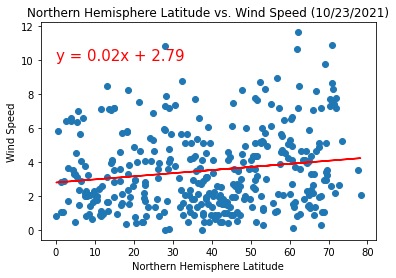

In [23]:
f4x_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Lat']
f4y_values = cityData_df.loc[cityData_df['Lat'] >= 0]['Wind Speed']
(f4slope, f4intercept, f4rvalue, f4pvalue, f4stderr) = linregress(f4x_values, f4y_values)
f4regress_values = f4x_values * f4slope + f4intercept
f4line_eq = "y = " + str(round(f4slope,2)) + "x + " + str(round(f4intercept,2))
plt.scatter(f4x_values,f4y_values)
plt.plot(f4x_values,f4regress_values,"r-")
plt.annotate(f4line_eq,(0,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {f4rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06228515851628871


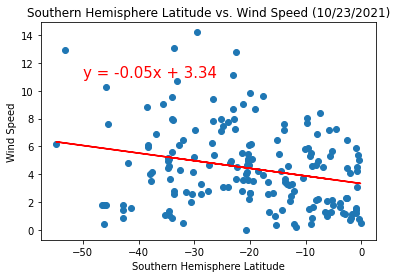

In [20]:
f4ax_values = cityData_df.loc[cityData_df['Lat'] < 0]['Lat']
f4ay_values = cityData_df.loc[cityData_df['Lat'] < 0]['Wind Speed']
(f4aslope, f4aintercept, f4arvalue, f4apvalue, f4astderr) = linregress(f4ax_values, f4ay_values)
f4aregress_values = f4ax_values * f4aslope + f4aintercept
f4aline_eq = "y = " + str(round(f4aslope,2)) + "x + " + str(round(f4aintercept,2))
plt.scatter(f4ax_values,f4ay_values)
plt.plot(f4ax_values,f4aregress_values,"r-")
plt.annotate(f4aline_eq,(-50,11),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed ({date.today().strftime("%m/%d/%Y")})')
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {f4arvalue**2}")
plt.show()